## Import Necessary Function Definitons from the main "LMS" file

In [37]:
from ipynb.fs.full.LMS import cost_function, hypothesis,X_train,y_train,theta,plt,np,plot_hypothesis_plane_plotly,plot_hypothesis_plane_matplot

## Stochastic Gradient Descent

In [38]:
def stochastic_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the stochastic gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    #print(theta,"cost is",cost_function(theta, x, y))
    print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for u in range(iterations):
        for i in range(1,len(y)):
            for j in range(len(theta)):
                theta[j] = theta[j] + alpha*(1/(len(y)))*(y[i]-hypothesis(theta,x[i]))*x[i][j]
        print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if u>0:
            if cost_list[u-1]-cost_list[u] < epsilon:
                break
        

    return theta, theta_list, cost_list

In [39]:
theta = np.zeros(3)
theta[1]=6
theta[2]=8
theta, theta_list, cost_list = stochastic_gradient_descent(theta, X_train, y_train, 0.1, 1000,0.01)
itrs=len(cost_list)
print(itrs)

[0. 6. 8.] cost is 85710.69545516712
[0.00977546 5.09884724 7.13011595] cost is 64242.62542608838
[0.01474178 4.329022   6.37075517] cost is 48242.486430680205
[0.01596297 3.67214073 5.7070845 ] cost is 36310.97679767938
[0.01431584 3.11236544 5.12629637] cost is 27407.47885406691
[0.01051971 2.63605235 4.61733057] cost is 20758.05672600167
[0.00516169 2.23144892 4.17063443] cost is 15787.060158985922
[-1.28194964e-03  1.88843266e+00  3.77795594e+00] cost is 12066.276391861342
[-0.00842754  1.59828603  3.43216528] cost is 9277.126945488408
[-0.01596867  1.35350234  3.12710103] cost is 7182.5619224398015
[-0.02366312  1.14761844  2.85743736] cost is 5606.163502572283
[-0.03132191  0.9750705   2.61856963] cost is 4416.608907106768
[-0.03879998  0.83106969  2.40651559] cost is 3516.117790231287
[-0.04598841  0.71149502  2.21783026] cost is 2831.861872688784
[-0.05280781  0.61280093  2.04953245] cost is 2309.576927491851
[-0.05920284  0.53193769  1.89904137] cost is 1908.8122079421294
[-0.

Text(0.5, 1.0, 'Error vs. Training Epoch')

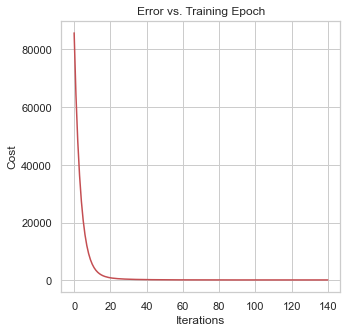

In [40]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(itrs), cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [41]:
plot_hypothesis_plane_plotly(theta)

[-0.04432013  0.77925863  0.01602303]


[-0.04432013  0.77925863  0.01602303]


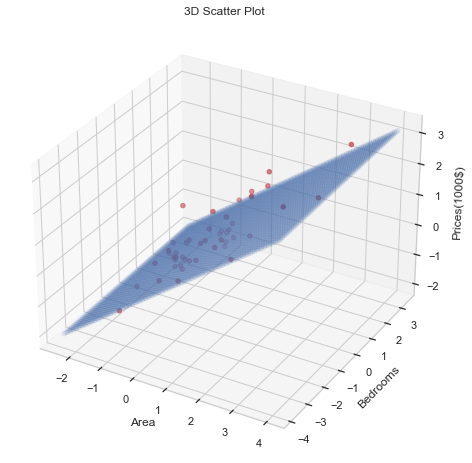

In [42]:
plot_hypothesis_plane_matplot(theta)

## Contour plot of J vs theta
Contour plot shows how our "theta" is converging to minimize our Cost Function.

In [43]:
def contour(alpha):
    #calculate theta using batch gradient descent - training step
    theta = np.zeros(3)
    theta[1]=6
    theta[2]=8
    theta, theta_list, cost_list = stochastic_gradient_descent(theta, X_train, y_train, alpha, 10000,0.01)
    #print total no of iterations
    itrs=len(cost_list)
    print("Total no of iterations:", itrs)
    #Plot a contour plot of the cost function vs theta1 and theta2
    #create a meshgrid of theta1 and theta2
    theta_list = np.array([list(t) for t in theta_list])
    print("THETA", theta_list)
    theta1_min, theta1_max = theta_list[:,1].min() - 1, theta_list[:,1].max() + 1
    theta2_min, theta2_max = theta_list[:,2].min() - 1, theta_list[:,2].max() + 1
    theta1_grid, theta2_grid = np.meshgrid(np.arange(theta1_min, theta1_max, 0.1), np.arange(theta2_min, theta2_max, 0.1))
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    
    Z = cost_function(np.c_[np.ones(theta1_grid.ravel().shape[0]), theta1_grid.ravel(), theta2_grid.ravel()], X_train, y_train)
    
    Z = Z.reshape(theta1_grid.shape)
    print(Z)
    
    # plot contour plot wothout background color and line color based on z values
    ax.contourf(theta1_grid, theta2_grid, Z, cmap=plt.cm.cool,  levels = np.linspace(Z.min(), Z.max(), 30))
    # ax.contour(theta1_grid, theta2_grid, Z, colors='k', levels=30)

    ax.scatter(theta_list[0][1], theta_list[0][2], c='r', s=40)
    #put alpha value on the plot
    ax.text(0.05, 0.95, 'alpha = %.2f' % alpha, transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title('Contour Plot of Cost Function')
    #plot theta_list on the contour plot
    for i in range(len(theta_list)):
        ax.scatter(theta_list[i][1], theta_list[i][2], c='r', s=40)
        
    plt.show()


[0. 6. 8.] cost is 85710.69545516712
[5.90623147e-03 5.53339564e+00 7.54985552e+00] cost is 74204.29869875267
[0.01042123 5.10193116 7.1293639 ] cost is 64269.15013419093
[0.01370125 4.70306296 6.73646342] cost is 55689.697025441084
[0.01588844 4.33442965 6.36923814] cost is 48280.00316232579
[0.01711204 3.99383903 6.0259075 ] cost is 41879.67709872383
[0.01748941 3.67925603 5.70481674] cost is 36350.36035751851
[0.01712702 3.38879145 5.40442793] cost is 31572.698579538832
[0.01612135 3.12069155 5.12331167] cost is 27443.72918933606
[0.01455969 2.87332837 4.8601394 ] cost is 23874.628288551132
[0.01252099 2.64519076 4.61367625] cost is 20788.7673683984
[0.01007646 2.43487601 4.38277434] cost is 18120.037229382495
[0.00729031 2.24108211 4.16636665] cost is 15811.402357937926
[0.00422028 2.06260054 3.96346125] cost is 13813.654064875167
[9.18249769e-04 1.89830962e+00 3.77313599e+00] cost is 12084.335050275742
[-2.56930090e-03  1.74716826e+00  3.59453356e+00] cost is 10586.811819475655
[-

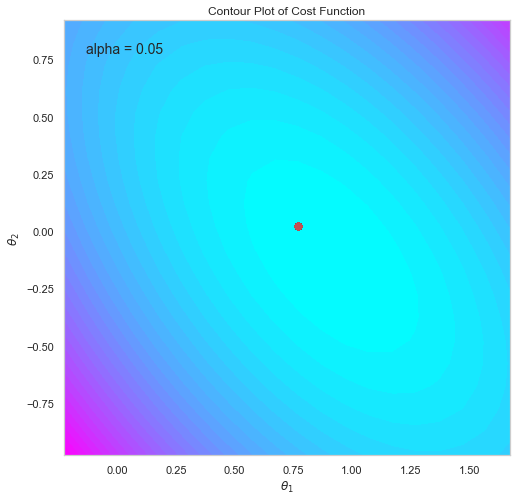

[0. 6. 8.] cost is 85710.69545516712
[0.00977546 5.09884724 7.13011595] cost is 64242.62542608838
[0.01474178 4.329022   6.37075517] cost is 48242.486430680205
[0.01596297 3.67214073 5.7070845 ] cost is 36310.97679767938
[0.01431584 3.11236544 5.12629637] cost is 27407.47885406691
[0.01051971 2.63605235 4.61733057] cost is 20758.05672600167
[0.00516169 2.23144892 4.17063443] cost is 15787.060158985922
[-1.28194964e-03  1.88843266e+00  3.77795594e+00] cost is 12066.276391861342
[-0.00842754  1.59828603  3.43216528] cost is 9277.126945488408
[-0.01596867  1.35350234  3.12710103] cost is 7182.5619224398015
[-0.02366312  1.14761844  2.85743736] cost is 5606.163502572283
[-0.03132191  0.9750705   2.61856963] cost is 4416.608907106768
[-0.03879998  0.83106969  2.40651559] cost is 3516.117790231287
[-0.04598841  0.71149502  2.21783026] cost is 2831.861872688784
[-0.05280781  0.61280093  2.04953245] cost is 2309.576927491851
[-0.05920284  0.53193769  1.89904137] cost is 1908.8122079421294
[-0.

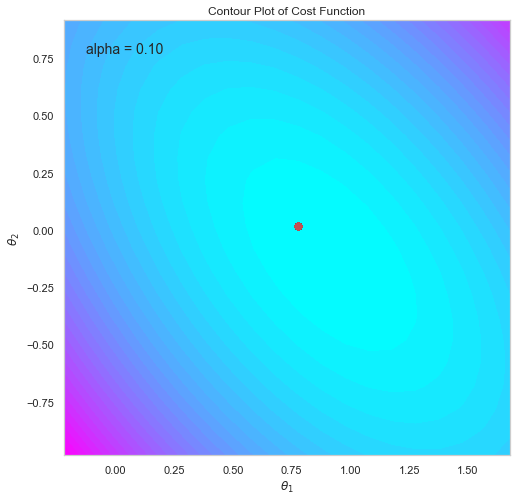

[0. 6. 8.] cost is 85710.69545516712
[0.01187973 4.69432994 6.73873847] cost is 55622.04028239335
[0.01444647 3.66491187 5.70936436] cost is 36270.818791469464
[0.01075088 2.85563795 4.86681031] cost is 23806.631553338222
[3.05696615e-03 2.22166809e+00 4.17492679e+00] cost is 15762.214981376828
[-0.00697558  1.72717446  3.60470713] cost is 10556.24342363642
[-0.01814906  1.34353711  3.13286645] cost is 7174.919982966619
[-0.02961681  1.04790032  2.74070406] cost is 4968.0527097573895
[-0.04079706  0.82201787  2.41319266] cost is 3518.443025437079
[-0.05130624  0.65132914  2.13824903] cost is 2558.2227203639695
[-0.06090756  0.52422013  1.90615012] cost is 1915.258050255631
[-0.06947144  0.4314323   1.70906536] cost is 1478.810810626756
[-0.07694539  0.36558972  1.54068214] cost is 1177.5337986696654
[-0.08333107  0.32082088  1.3959058 ] cost is 965.367354874911
[-0.08866702  0.29245615  1.27061931] cost is 812.4976798781406
[-0.09301573  0.27678593  1.16149072] cost is 699.558375695490

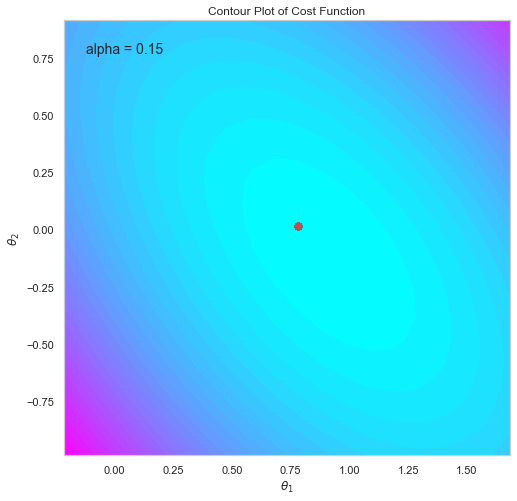

[0. 6. 8.] cost is 85710.69545516712
[0.0124656  4.31794051 6.37381264] cost is 48165.21145257454
[0.01074788 3.09531503 5.13231687] cost is 27332.805549431792
[9.75867656e-04 2.21173364e+00 4.17924547e+00] cost is 15736.851377902434
[-0.01278255  1.57798522  3.44287539] cost is 9251.538017874547
[-0.02790029  1.12799061  2.86973113] cost is 5598.996498945782
[-0.04274678  0.8128304   2.41990703] cost is 3520.721632516235
[-0.05637144  0.59631258  2.0635919 ] cost is 2320.6922865133724
[-0.06827963  0.4516833   1.77848666] cost is 1613.403624908754
[-0.07827522  0.35918594  1.54788507] cost is 1184.8761660019272
[-0.08635106  0.30424987  1.35924722] cost is 915.9621382691581
[-0.09261365  0.27614671  1.20313891] cost is 740.0094778642818
[-0.09723215  0.26699334  1.07244292] cost is 619.4786451149611
[-0.10040456  0.27101246  0.96177227] cost is 533.0174887727759
[-0.1023358   0.28398412  0.86703359] cost is 468.3090246101709
[-0.10322429  0.30283911  0.78510213] cost is 418.1075568029

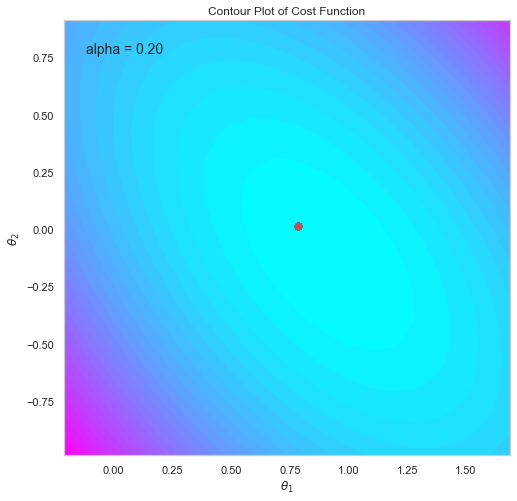

[0. 6. 8.] cost is 85710.69545516712
[0.01175616 3.96789025 6.03355217] cost is 41717.7799377
[0.00462962 2.60776312 4.62842466] cost is 20662.15022777731
[-0.01125972  1.70655798  3.61500547] cost is 10524.265624562147
[-0.02995773  1.11794948  2.87593449] cost is 5595.190279900821
[-0.04814845  0.74152145  2.32990096] cost is 3160.6695937695267
[-0.0641534   0.50843258  1.92047695] cost is 1928.2358987790378
[-0.07728253  0.37155106  1.60842007] cost is 1280.9200162038178
[-0.08741836  0.29866552  1.36636636] cost is 923.0311023030517
[-0.09475392  0.26781369  1.1751699 ] cost is 711.9393412570246
[-0.09963113  0.26406867  1.02137744] cost is 578.1276572788062
[-0.1024442   0.27732838  0.89548512] cost is 487.1498744277484
[-0.10358455  0.3007957   0.79073445] cost is 421.4963599103362
[-0.10341173  0.3299336   0.70228015] cost is 371.92498606003875
[-0.10224038  0.36174743  0.62661443] cost is 333.2984305796812
[-0.10033648  0.394292    0.56116821] cost is 302.5711597303404
[-0.0979

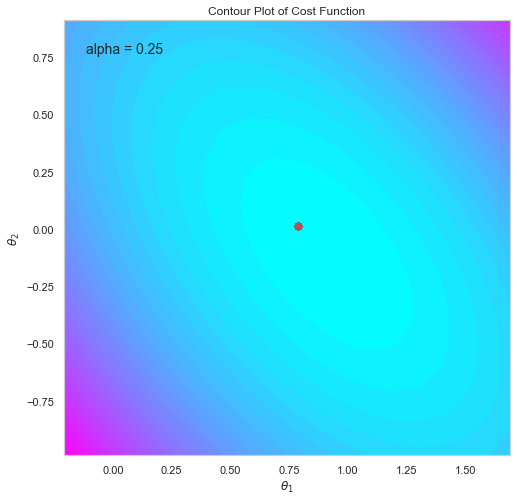

[0. 6. 8.] cost is 85710.69545516712
[0.00995285 3.64249839 5.71628715] cost is 36145.44269453034
[-3.11677632e-03  2.19137907e+00  4.18796940e+00] cost is 15684.50784003007
[-0.02446911  1.31270478  3.15037952] cost is 7150.670518405473
[-0.04650354  0.79402516  2.43345777] cost is 3525.1397455308233
[-0.0656938   0.50035219  1.9277001 ] cost is 1934.7726454441665
[-0.08075779  0.34606943  1.56239328] cost is 1199.7286452265848
[-0.09158269  0.2770106   1.29169888] cost is 832.7960148826786
[-0.09860821  0.25902807  1.08575188] cost is 630.7691001199256
[-0.10248402  0.27070279  0.92496379] cost is 507.3907776519769
[-0.10388914  0.29869697  0.796374  ] cost is 424.9208515365825
[-0.10344456  0.33479274  0.69131079] cost is 366.01194874863364
[-0.10167824  0.37400654  0.60388998] cost is 322.08529531018746
[-0.09901805  0.41338935  0.5300497 ] cost is 288.4786096132957
[-0.09579847  0.45126443  0.46692849] cost is 262.38586524565346
[-0.09227313  0.48674377  0.4124634 ] cost is 241.95

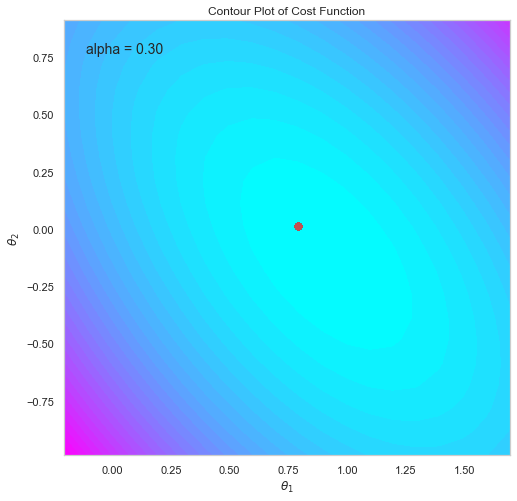

[0. 6. 8.] cost is 85710.69545516712
[0.00723725 3.34018586 5.42045671] cost is 31331.399121441045
[-0.01186029  1.83667853  3.80251285] cost is 11969.854245369612
[-0.0376304   1.00801851  2.76624544] cost is 4959.818386428771
[-0.06132073  0.57060761  2.0849811 ] cost is 2337.4645009045853
[-0.07975363  0.35773206  1.6230298 ] cost is 1295.8759993365625
[-0.09243234  0.27168171  1.29878518] cost is 839.6832645841307
[-0.10001406  0.25544464  1.06284619] cost is 611.6710655186275
[-0.1035368   0.27597938  0.88503603] cost is 480.6245862292311
[-0.10405355  0.31433363  0.74669275] cost is 396.19139156906596
[-0.10248007  0.35981111  0.63608462] cost is 337.53036578074176
[-0.09955006  0.40653153  0.5456788 ] cost is 294.98049469424166
[-0.09582008  0.45140462  0.47050993] cost is 263.40468565633864
[-0.09169463  0.49293958  0.40720227] cost is 239.69427715971693
[-0.08745628  0.53054754  0.35338072] cost is 221.7784111526523
[-0.08329416  0.56413479  0.30731356] cost is 208.19292288872

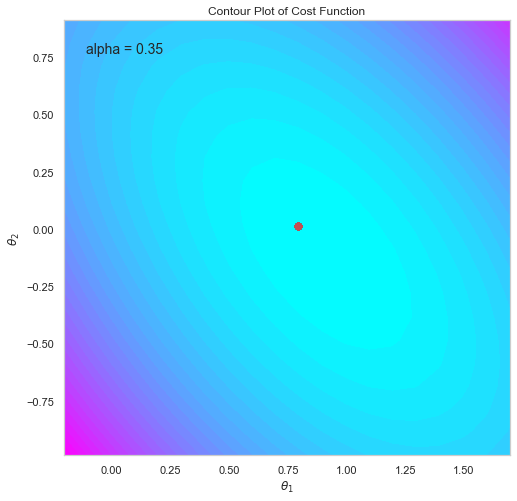

[0. 6. 8.] cost is 85710.69545516712
[3.77262567e-03 3.05946932e+00 5.14460219e+00] cost is 27174.116437652367
[-0.02110365  1.53539564  3.4647314 ] cost is 9196.563185089273
[-0.0500693   0.77460587  2.44718966] cost is 3529.3786848758155
[-0.07388294  0.42107345  1.80767888] cost is 1641.9501239709234
[-0.09025404  0.28133023  1.3879224 ] cost is 944.613347765599
[-0.0997399   0.25074926  1.09915617] cost is 642.2799561006873
[-0.10382007  0.2731818   0.89106551] cost is 484.8162220287677
[-0.10405689  0.31886858  0.73469061] cost is 389.4311243914416
[-0.1017797   0.37236122  0.6130039 ] cost is 325.95564067807015
[-0.09800771  0.42592571  0.51570421] cost is 281.6002884939948
[-0.09347169  0.47594664  0.43633066] cost is 249.8735013943328
[-0.08866804  0.520973    0.37065466] cost is 226.9272692867158
[-0.08391646  0.56066116  0.31577735] cost is 210.23908540010518
[-0.07940983  0.59520735  0.26961772] cost is 198.0636750006943
[-0.07525348  0.62504668  0.23061779] cost is 189.1613

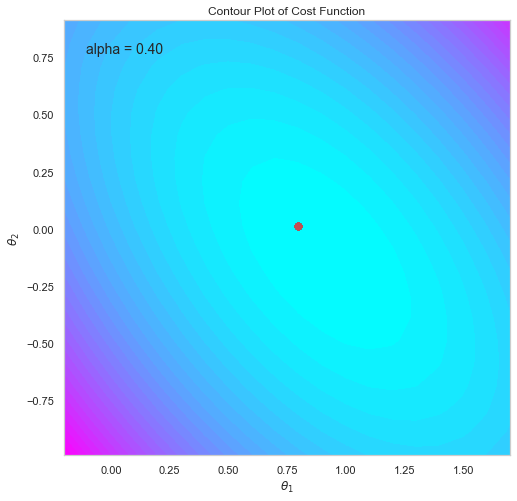

[0. 6. 8.] cost is 85710.69545516712
[-2.94569182e-04  2.79895567e+00  4.88736066e+00] cost is 23585.374849839576
[-0.03046048  1.2803302   3.16827147] cost is 7124.339670589576
[-0.06136851  0.59803086  2.180794  ] cost is 2587.9427748316366
[-0.08403154  0.3255523   1.584451  ] cost is 1222.476436967405
[-0.09749456  0.24886132  1.20285215] cost is 737.4038562204787
[-0.10349554  0.26135631  0.9435965 ] cost is 521.0988229327002
[-0.1042687   0.31062248  0.75745922] cost is 402.3053092098963
[-0.10175515  0.3714649   0.61755953] cost is 327.92803098714916
[-0.0974084   0.43226918  0.50869937] cost is 278.2748887515991
[-0.0922259   0.48811844  0.4218851 ] cost is 244.18552865887145
[-0.0868468   0.53733264  0.35149488] cost is 220.49540944504554
[-0.08165289  0.57973937  0.29379994] cost is 203.93722927071792
[-0.07685161  0.61581876  0.24618131] cost is 192.32600606408957
[-0.07253775  0.64628827  0.20670604] cost is 184.16447034797724
[-0.06873669  0.67190748  0.17389076] cost is 1

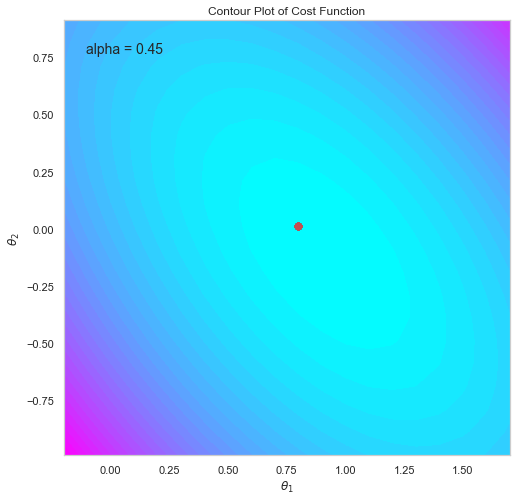

[0. 6. 8.] cost is 85710.69545516712
[-0.00483329  2.55733673  4.64745893] cost is 20488.55811432422
[-0.03963601  1.06521358  2.90762346] cost is 5573.846644118003
[-0.07129783  0.46665965  1.95705797] cost is 1961.3146625043316
[-0.09183378  0.26924495  1.40248541] cost is 959.3490642636846
[-0.1019433   0.245025    1.05416368] cost is 604.9924280434465
[-0.10453782  0.28969543  0.81904003] cost is 439.00241162568256
[-0.10245525  0.3565303   0.65029393] cost is 344.0773748540791
[-0.09784121  0.42543784  0.52344621] cost is 284.2230740509649
[-0.09213119  0.48849878  0.42499907] cost is 244.95515568491712
[-0.08620535  0.54323467  0.34699715] cost is 218.78749158754982
[-0.08055808  0.58949634  0.28439446] cost is 201.23096078229028
[-0.07543476  0.62804373  0.23375692] cost is 189.40829071209873
[-0.0709291   0.65991261  0.19260534] cost is 181.42539046034227
[-0.06704795  0.68614475  0.1590691 ] cost is 176.02178233501206
[-0.06375218  0.7076837   0.1316933 ] cost is 172.354519959

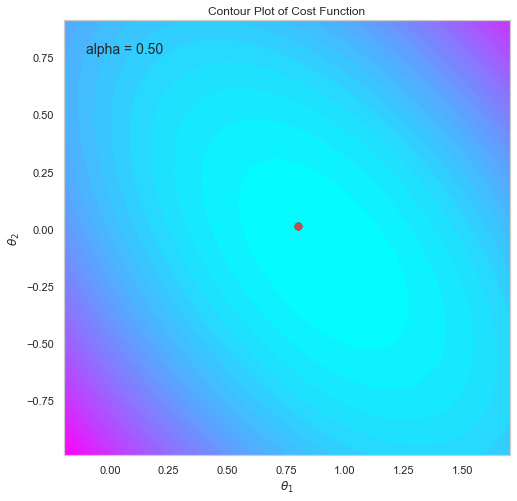

[0. 6. 8.] cost is 85710.69545516712
[-0.00972665  2.3333843   4.4237078 ] cost is 17817.159257968797
[-0.04841073  0.88459125  2.67801165] cost is 4411.38538001849
[-0.07976081  0.37112785  1.76793117] cost is 1537.8120237218138
[-0.09748614  0.2411555   1.25217905] cost is 786.1881087118536
[-0.10411642  0.25936803  0.93228164] cost is 513.5765135004732
[-0.10362078  0.32715819  0.71684627] cost is 379.31899347576217
[-0.09924532  0.40461235  0.56216085] cost is 301.12167341683244
[-0.09317025  0.47674366  0.44609613] cost is 252.4510491440436
[-0.0867002   0.53893008  0.35656237] cost is 221.4309506010057
[-0.0805386   0.59067812  0.28634488] cost is 201.47878650643065
[-0.07501398  0.63298732  0.23074865] cost is 188.58779776232646
[-0.07023756  0.6672648   0.18648982] cost is 180.23309268302427
[-0.0662035   0.69490159  0.15114828] cost is 174.80294327236297
[-0.06284927  0.71712696  0.12287841] cost is 171.26289223817287
[-0.06008996  0.73497586  0.10024288] cost is 168.947064951

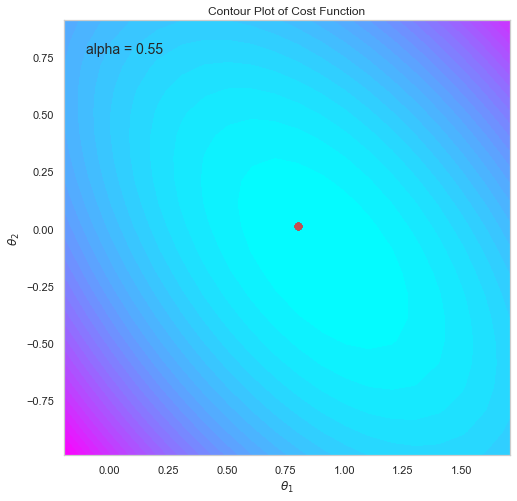

[0. 6. 8.] cost is 85710.69545516712
[-0.0148707   2.12594548  4.21499678] cost is 15513.474881954438
[-0.05662652  0.73371968  2.47529827] cost is 3537.3880257148876
[-0.08675415  0.30390744  1.60693503] cost is 1245.8870940504137
[-0.10124985  0.23313651  1.12632855] cost is 666.0512739209587
[-0.10451114  0.28479294  0.8304655 ] cost is 446.2953557149488
[-0.10137303  0.3684566   0.63123995] cost is 334.002655765788
[-0.09528269  0.45147651  0.48827362] cost is 268.7427029203795
[-0.08831013  0.52363148  0.38151341] cost is 229.14774633786962
[-0.08155262  0.58309233  0.29993628] cost is 204.77522344079682
[-0.07551018  0.63091284  0.23680595] cost is 189.682394677751
[-0.07034825  0.66892076  0.18761529] cost is 180.30172979102758
[-0.06606055  0.69895309  0.14914552] cost is 174.45274617018836
[-0.06256277  0.7226136   0.11900089] cost is 170.79351415364462
[-0.05974329  0.74122646  0.09535474] cost is 168.49535394752948
[-0.05748882  0.75585749  0.07679544] cost is 167.0453672882

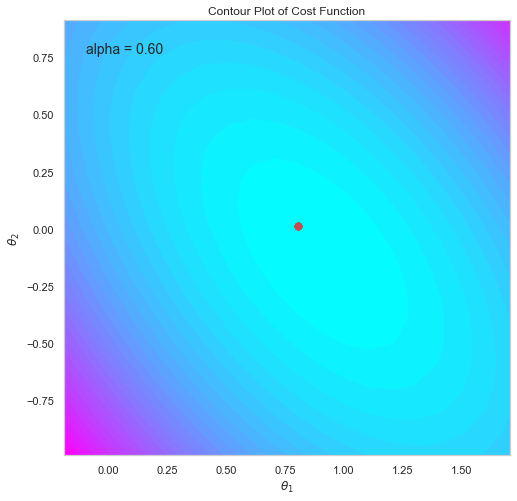

[0. 6. 8.] cost is 85710.69545516712
[-0.02017336  1.93393824  4.02028902] cost is 13527.464697624586
[-0.06417511  0.60847621  2.29589981] cost is 2877.782884119127
[-0.09233723  0.25895515  1.4688571 ] cost is 1039.7182438711727
[-0.10340896  0.23917064  1.01952392] cost is 578.2381384233294
[-0.10357224  0.31651959  0.74394449] cost is 394.42885594812407
[-0.09829218  0.41041295  0.55830499] cost is 298.7547372869037
[-0.09102277  0.49541574  0.42544787] cost is 244.10194241302983
[-0.0836141   0.56554936  0.32701928] cost is 212.0079839743434
[-0.07691435  0.62126308  0.25274116] cost is 192.98440735247755
[-0.07121902  0.66477739  0.19615403] cost is 181.65615793129953
[-0.06654811  0.69849642  0.15283656] cost is 174.886432523502
[-0.0628011   0.72452778  0.11959611] cost is 170.82629583626183
[-0.05983735  0.7445885   0.09405671] cost is 168.38117310403652
[-0.05751459  0.76003494  0.0744216 ] cost is 166.90134784693856
[-0.05570521  0.77192367  0.05932071] cost is 166.000320996

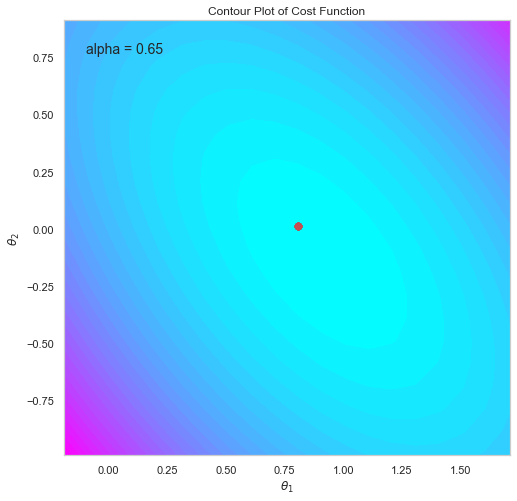

[0. 6. 8.] cost is 85710.69545516712
[-0.02555338  1.75634726  3.83861669] cost is 11815.755783667702
[-0.07098823  0.50527995  2.13671412] cost is 2377.5223457678317
[-0.09660933  0.23142703  1.34950405] cost is 889.9495898804336
[-0.1042442   0.25483095  0.9276946 ] cost is 511.0120167983466
[-0.1016786   0.35136312  0.66931713] cost is 353.2144929605761
[-0.09475631  0.45118221  0.49533617] cost is 270.9957555495763
[-0.08677216  0.53568751  0.37148893] cost is 225.28082917053345
[-0.07928363  0.60254875  0.2807232 ] cost is 199.40039203196244
[-0.07287714  0.65402144  0.21323791] cost is 184.65090442194494
[-0.06765973  0.69318132  0.16271261] cost is 176.2107743424154
[-0.06353116  0.72281771  0.12475913] cost is 171.36296385184485
[-0.06032118  0.74519394  0.09620367] cost is 168.56682487444317
[-0.05785286  0.76207071  0.07470232] cost is 166.9458968508312
[-0.05596821  0.77479361  0.05850619] cost is 166.00035372628744
[-0.05453576  0.78438299  0.04630387] cost is 165.444492690

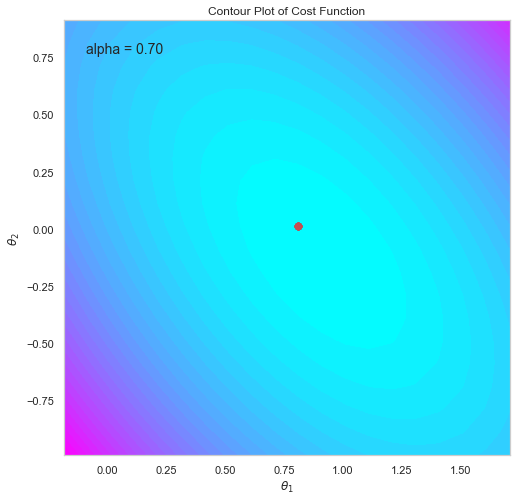

[0. 6. 8.] cost is 85710.69545516712
[-0.03093943  1.59222     3.66907649] cost is 10340.773554319787
[-0.07702953  0.42102259  1.99505692] cost is 1995.7372214281556
[-0.09969296  0.21744701  1.24550235] cost is 777.7497654307774
[-0.10401753  0.27687582  0.84776999] cost is 457.5926651318896
[-0.0991414   0.38723304  0.60413494] cost is 319.8557444345306
[-0.09104217  0.48975394  0.4404214 ] cost is 249.0053183586594
[-0.08272556  0.57208907  0.32482362] cost is 210.89280915707207
[-0.07541767  0.63496378  0.24122325] cost is 190.1382368346926
[-0.06945217  0.68203237  0.18009326] cost is 178.77641938737597
[-0.06477366  0.71697958  0.13517008] cost is 172.5320542112396
[-0.061189    0.74283718  0.10208199] cost is 169.08616396332326
[-0.05848082  0.76194128  0.07768561] cost is 167.175316297777
[-0.05645248  0.77604703  0.05968896] cost is 166.10922796593437
[-0.05494152  0.78645946  0.04641012] cost is 165.5098383144542
[-0.05381979  0.79414477  0.03661117] cost is 165.169548920668

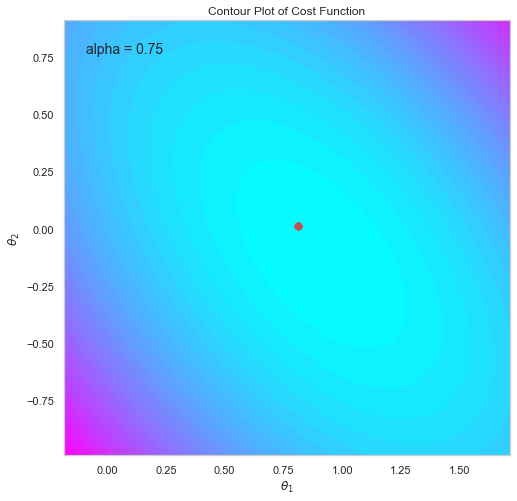

[0. 6. 8.] cost is 85710.69545516712
[-0.03626918  1.44066302  3.51082558] cost is 9069.983628983786
[-0.0822877   0.35300795  1.86860647] cost is 1702.112902077574
[-0.10172175  0.21391936  1.15413745] cost is 691.0068795328627
[-0.10296405  0.30294529  0.7774259 ] cost is 413.9527454098477
[-0.09620861  0.4227862   0.54661396] cost is 292.5688044361829
[-0.08734463  0.52563425  0.39217248] cost is 231.5428855655723
[-0.07899662  0.60470882  0.28427789] cost is 199.90048649795654
[-0.07204886  0.66324147  0.20743408] cost is 183.3484096023731
[-0.06660562  0.70594702  0.15224822] cost is 174.65074432851156
[-0.0624794   0.73692819  0.11247494] cost is 170.06230797666043
[-0.05941034  0.75935289  0.0837657 ] cost is 167.63090429958538
[-0.05715313  0.77556961  0.06302871] cost is 166.33534745625067
[-0.05550423  0.78729276  0.04804559] cost is 165.64006857521414
[-0.05430467  0.79576628  0.03721826] cost is 165.26347143636073
[-0.05343419  0.80189065  0.0293935 ] cost is 165.0570606997

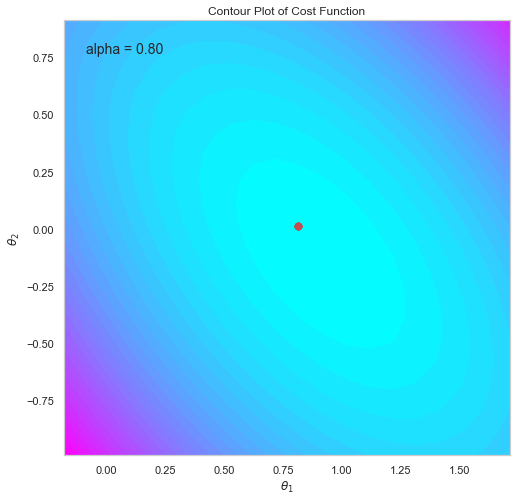

[0. 6. 8.] cost is 85710.69545516712
[-0.04148851  1.3008384   3.36307763] cost is 7975.230730043315
[-0.08677086  0.29889889  1.75535546] cost is 1474.1824196174098
[-0.1028319   0.21837679  1.07322419] cost is 621.8958168236763
[-0.1012886   0.33133378  0.71489513] cost is 377.6068079215867
[-0.09307244  0.45718708  0.49543493] cost is 270.1209949617618
[-0.08379469  0.5586437   0.3495513 ] cost is 217.66897801506948
[-0.07564236  0.63378219  0.24894158] cost is 191.5148542377101
[-0.06916906  0.68785427  0.17848623] cost is 178.38576881487106
[-0.06428131  0.7263609   0.12884111] cost is 171.76824690072974
[-0.06069017  0.75367578  0.09377168] cost is 168.4196129764255
[-0.05809221  0.7730233   0.06897296] cost is 166.71712133652005
[-0.05622956  0.78671989  0.05142931] cost is 165.84626130093233
[-0.05490113  0.79641409  0.03901582] cost is 165.39718987510906
[-0.05395665  0.80327496  0.03023154] cost is 165.16313926714506
[-0.05328641  0.80813048  0.02401517] cost is 165.039454463

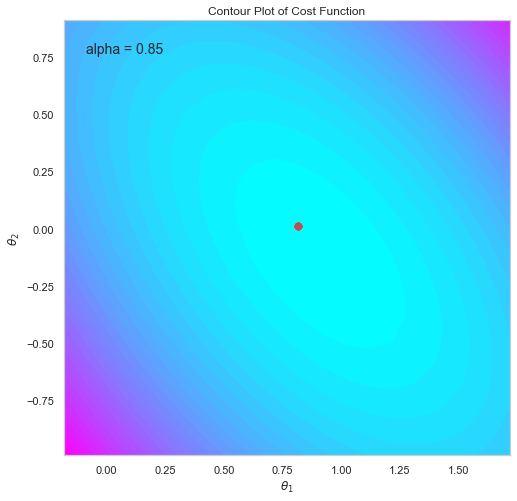

[0. 6. 8.] cost is 85710.69545516712
[-0.04655081  1.17196055  3.22509924] cost is 7032.162438933788
[-0.09050185  0.25667113  1.65356912] cost is 1295.3068190930758
[-0.10315629  0.22885763  1.00100239] cost is 565.3255377439137
[-0.09916544  0.3608202   0.65882638] cost is 346.9452969552756
[-0.08987781  0.48994255  0.44960507] cost is 251.60239423221645
[-0.08047498  0.58878943  0.31175744] cost is 206.65218640704418
[-0.07268158  0.65960932  0.21808534] cost is 185.13141664698514
[-0.06674678  0.70925701  0.15366532] cost is 174.77295237629323
[-0.06241451  0.74380008  0.10915976] cost is 169.76898436878358
[-0.05932299  0.76776989  0.07835836] cost is 167.3425200399969
[-0.05714454  0.78438716  0.05702656] cost is 166.16035284135822
[-0.05562041  0.79590343  0.04224885] cost is 165.5807671320849
[-0.05455842  0.80388364  0.03201027] cost is 165.29416875459245
[-0.05382018  0.80941333  0.02491619] cost is 165.15080075974802
[-0.05330769  0.81324495  0.02000073] cost is 165.07797502

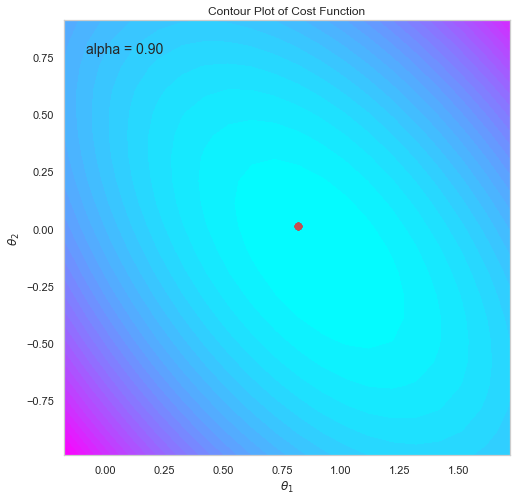

In [44]:
#create an array of learning rates from 0.05 to 0.95 in steps of 0.05
learning_rates = np.arange(0.05, 0.95, 0.05)
# contour_plot(learning_rates)
# k=1
for i in learning_rates:
    contour(i)
    # k+=1